In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data_modified.csv', low_memory=False)
df = df.drop(columns=['Unnamed: 0', 'Description', 'Reference number', 'Location', 'id', 'Functions'])
df = df.dropna()
print(len(df))
df.head()

46090


,Bracelet material,Brand,Case diameter,Case material,Condition,Dial,Gender,Model,Movement,Scope of delivery,...,Chronograph,GMT,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm,Country
0,Steel,Bulgari,41.0,Steel,New,Black,Men's watch/Unisex,Octo,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,United States of America
1,Steel,Tissot,39.0,Steel,New,Mother of pearl,Men's watch/Unisex,PR 100,Quartz,"Original box, no original papers",...,0,0,0,0,0,0,0,0,0,Japan
2,Leather,Mido,41.0,Steel,New,Silver,Men's watch/Unisex,Belluna,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan
3,Steel,Mido,42.0,Steel,New,Black,Men's watch/Unisex,Multifort GMT,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan
4,Leather,Seiko,42.0,Steel,Unworn,Black,Men's watch/Unisex,Kinetic,Quartz,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan


In [3]:
df.price.describe()

count     46090.000000
mean      12479.643979
std       26859.698690
min          30.000000
25%        2309.000000
50%        5650.000000
75%       13008.250000
max      921236.000000
Name: price, dtype: float64

In [4]:
df.groupby('Brand')['price'].mean().sort_values(ascending=False)[0:10]

Brand
Richard Mille       316478.533333
Greubel Forsey      293750.000000
F.P.Journe          102912.000000
De Bethune          101631.666667
Patek Philippe       68669.957155
Audemars Piguet      60308.138194
A. Lange & Söhne     55694.768212
Roger Dubuis         45161.755556
HYT                  44115.000000
Urwerk               33854.000000
Name: price, dtype: float64

In [5]:
df.groupby('Condition')['price'].mean().sort_values(ascending=False)

Condition
Unworn       18296.950617
Very good    13425.638004
New          10727.698780
Good          8571.116790
Fair          7161.645161
Poor          3964.680000
Name: price, dtype: float64

In [6]:
df.groupby('private_seller')['price'].mean().sort_values(ascending=False)

private_seller
0.0    13142.157717
1.0     6164.265082
Name: price, dtype: float64

In [7]:
df.groupby('Dial')['price'].mean().sort_values(ascending=False)

Dial
Transparent        62492.261950
Brown              24788.296154
Purple             19513.273810
Green              16193.660184
Blue               14958.208700
Pink               14667.141328
Grey               13171.372353
Gold               12665.963039
Yellow             11891.481707
White              10819.062014
Champagne          10797.716226
Black              10759.912666
Silver             10397.057008
Mother of pearl     9835.585507
Bronze              9659.761905
Orange              9271.402439
Red                 7609.350000
Bordeaux            7272.459459
Name: price, dtype: float64

In [8]:
pivot = df.groupby(['Case material', 'Bracelet material'])['price'].mean().unstack()
pivot.style.background_gradient(cmap='Reds')

Bracelet material,Aluminium,Ceramic,Gold/Steel,Leather,Platinum,Rose gold,Rubber,Silver,Steel,Textile,Titanium,White gold,Yellow gold
Case material,,,,,,,,,,,,,
Aluminum,796.500000,nan,nan,6000.000000,nan,nan,1666.812500,nan,512.500000,854.142857,693.333333,nan,nan
Bronze,nan,nan,nan,6211.436364,nan,nan,9869.000000,nan,5543.416667,3527.928571,nan,nan,nan
Carbon,nan,4699.000000,217.000000,11381.559322,nan,nan,49957.451128,nan,1058.500000,244058.846154,nan,nan,nan
Ceramic,nan,14497.503311,14864.000000,11796.551020,nan,18433.000000,15923.147059,nan,6476.631579,10666.011364,7727.142857,nan,nan
Gold/Steel,nan,1508.333333,11571.484627,4084.686499,nan,13886.666667,5433.703704,27797.000000,7411.531250,10459.571429,5451.000000,nan,10232.638889
Other,nan,nan,nan,32692.500000,nan,15995.000000,13500.000000,nan,14600.750000,nan,nan,nan,nan
Plastic,nan,nan,nan,3606.333333,nan,nan,1574.387097,nan,nan,4997.714286,nan,nan,nan
Platinum,nan,nan,14691.000000,85441.926316,109847.083333,nan,59135.666667,nan,15273.500000,43535.000000,257745.000000,nan,nan
Rose gold,nan,97388.000000,9268.482759,26073.433759,nan,70627.600000,46722.364026,nan,33013.916667,17681.580645,nan,nan,23873.692308


In [9]:
### remove this field next time
df = df.loc[df['Case diameter'] > 14]

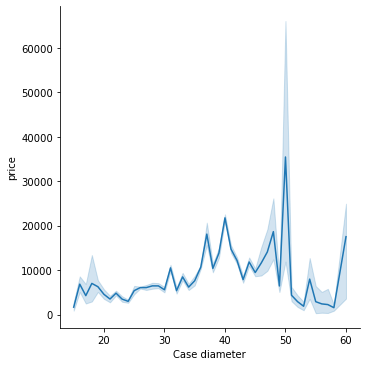

In [10]:
sns.relplot(x="Case diameter", y="price", kind="line", data=df)

In [11]:
df['Diameter_group'] = 0
for i in range(0, 24):
    start = 14 + i*2
    end = start + 1
    df.loc[(df['Case diameter'] >= start) & (df['Case diameter'] <= end), 'Diameter_group'] = '{}-{}'.format(start, end)

<AxesSubplot:xlabel='Diameter_group', ylabel='price'>

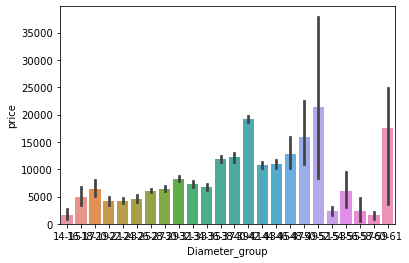

In [12]:
sns.barplot(x="Diameter_group", y="price", data=df.sort_values('Case diameter'))

In [13]:
df.groupby('Gender')['price'].mean().sort_values(ascending=False)

Gender
Men's watch/Unisex    13537.022252
Women's watch          7156.936659
Name: price, dtype: float64

In [14]:
df = df[df["Year of production"] > 1900]

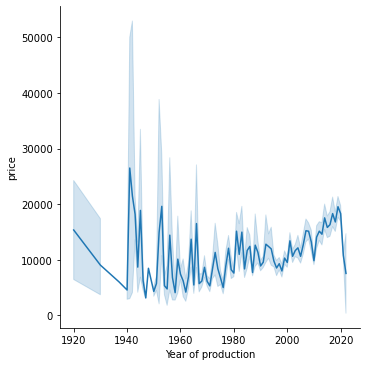

In [15]:
sns.relplot(x="Year of production", y="price", kind="line", data=df)

In [16]:
df['Decade'] = 0
for i in range(190, 220):
    start = i * 10
    end = start + 10
    df.loc[(df['Year of production'] >= start) & (df['Year of production'] < end), 'Decade'] = '{}s'.format(start)

<AxesSubplot:xlabel='Decade', ylabel='price'>

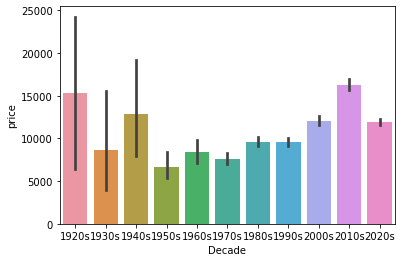

In [17]:
sns.barplot(x="Decade", y="price", data=df.sort_values('Year of production'))

In [18]:
df.groupby('Movement')['price'].mean().sort_values(ascending=False)

Movement
Manual winding    18266.233047
Automatic         13764.479079
Quartz             3588.177973
Name: price, dtype: float64

In [19]:
df.groupby('Scope of delivery')['price'].mean().sort_values(ascending=False)

Scope of delivery
Original box, original papers          14251.671314
Original papers, no original box       14190.467927
Original box, no original papers        9572.100664
No original box, no original papers     8039.929201
Name: price, dtype: float64

In [20]:
df.groupby('Crystal')['price'].mean().sort_values(ascending=False)

Crystal
Sapphire crystal    13316.817062
Plexiglass           7488.901442
Mineral Glass        1393.357635
Name: price, dtype: float64

In [21]:
functions = ['Date', 'Weekday', 'Month', 'Year', 'Chronograph', 'GMT', 
             'Tachymeter', 'Moon phase', 'Annual calendar', 'Perpetual calendar',
             'Tourbillon', 'Flyback', 'Alarm']
    
functions_overview = pd.DataFrame(columns=functions)

for i in [0,1]:
    values = []
    for function in functions:
        v = df.loc[df[function] == i, 'price'].mean()
        values.append(v)
    functions_overview.loc[i] = values

functions_overview

,Date,Weekday,Month,Year,Chronograph,GMT,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm
0,13252.318182,12448.986104,12266.019152,12448.655132,11370.545048,12223.064810,12331.855084,11981.793188,12312.227325,12217.908831,12277.749254,12315.858455,12535.551447
1,12044.747409,13459.341779,23347.464208,14058.644128,16845.728366,16507.833802,16724.520782,38550.949829,30952.654378,35411.570896,93597.991597,49864.625592,5400.185668


In [22]:
mov = df['Movement'].isin(['Manual winding', 'Automatic']).astype(int)
fun = df[functions].mul(mov, axis=0)
df = df.merge(fun, left_index=True, right_index=True, suffixes=(None, '_m'))
functions = [s + '_m' for s in functions]

for i in [0,1]:
    values = []
    for function in functions:
        v = df.loc[df[function] == i, 'price'].mean()
        values.append(v)
    functions_overview.loc[i] = values

functions_overview

,Date,Weekday,Month,Year,Chronograph,GMT,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm
0,11627.467457,12410.288168,12239.371321,12421.592728,11099.209417,12170.239933,12299.598882,11976.230196,12289.858162,12191.995396,12277.749254,12314.728388,12478.077676
1,13152.890327,14618.943175,26246.468788,15446.759406,18787.725556,17740.001142,18057.422975,39953.946556,39033.809384,44250.117647,93597.991597,51406.941176,18629.297297


In [23]:
df = df.dropna()
df.head()

,Bracelet material,Brand,Case diameter,Case material,Condition,Dial,Gender,Model,Movement,Scope of delivery,...,Year_m,Chronograph_m,GMT_m,Tachymeter_m,Moon phase_m,Annual calendar_m,Perpetual calendar_m,Tourbillon_m,Flyback_m,Alarm_m
0,Steel,Bulgari,41.0,Steel,New,Black,Men's watch/Unisex,Octo,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,0
1,Steel,Tissot,39.0,Steel,New,Mother of pearl,Men's watch/Unisex,PR 100,Quartz,"Original box, no original papers",...,0,0,0,0,0,0,0,0,0,0
2,Leather,Mido,41.0,Steel,New,Silver,Men's watch/Unisex,Belluna,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,0
3,Steel,Mido,42.0,Steel,New,Black,Men's watch/Unisex,Multifort GMT,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,0
4,Leather,Seiko,42.0,Steel,Unworn,Black,Men's watch/Unisex,Kinetic,Quartz,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from category_encoders.binary import BinaryEncoder
from category_encoders.target_encoder import TargetEncoder
import time
#
#
#
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import PoissonRegressor, GammaRegressor
#from sklearn.model_selection import KFold
#
#

In [25]:
df.dtypes

Bracelet material        object
Brand                    object
Case diameter           float64
Case material            object
Condition                object
Dial                     object
Gender                   object
Model                    object
Movement                 object
Scope of delivery        object
Year of production      float64
price                   float64
private_seller          float64
Crystal                  object
Date                      int64
Weekday                   int64
Month                     int64
Year                      int64
Chronograph               int64
GMT                       int64
Tachymeter                int64
Moon phase                int64
Annual calendar           int64
Perpetual calendar        int64
Tourbillon                int64
Flyback                   int64
Alarm                     int64
Country                  object
Diameter_group           object
Decade                   object
Date_m                    int64
Weekday_

In [26]:
categorical_var = ['Bracelet material', 'Brand', 'Case material',
       'Condition', 'Dial', 'Gender', 'Model', 'Movement', 'Scope of delivery',
       'private_seller', 'Crystal', 'Decade', 'Diameter_group', 'Country']

interaction_dummies = []

In [27]:
%%time

def create_interaction_dummy(var1, var2):
    d = '{}/{}'.format(var1,var2)
    return(d)

for var in ['Bracelet material', 'Case material', 'Condition', 'Gender', 'Movement', 'Scope of delivery', 'private_seller', 'Crystal', 'Decade', 'Diameter_group']:
    name = '{}/{}'.format('Brand',var)
    df[name] = df.apply(lambda x: create_interaction_dummy(x['Brand'], x[var]), axis=1)
    
    interaction_dummies.append(name)

Wall time: 3.24 s


In [32]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_var),
    ], remainder='passthrough')


transformers = [
    ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), categorical_var)], remainder='passthrough'),
    ColumnTransformer([('cat', BinaryEncoder(), categorical_var)], remainder='passthrough'),
    ColumnTransformer([('cat', TargetEncoder(), categorical_var)], remainder='passthrough'),
]

models = [
    LinearRegression(),
    Ridge(random_state=13),
    RandomForestRegressor(random_state=13)
]


for transformer in transformers:
    start_time = time.time()
    print(transformer)
    
    for model in models:
        pipe = Pipeline([('tf', transformer), ('model', model)])
        scores = cross_val_score(pipe, X, y, cv=5, n_jobs=5)
        print(np.mean(scores))
    print('{} seconds'.format(time.time() - start_time))

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Bracelet material', 'Brand', 'Case material',
                                  'Condition', 'Dial', 'Gender', 'Model',
                                  'Movement', 'Scope of delivery',
                                  'private_seller', 'Crystal', 'Decade',
                                  'Diameter_group', 'Country'])])
0.910495367273867
0.9119515677863935
0.9181042154150234
279.81046652793884 seconds
ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', BinaryEncoder(),
                                 ['Bracelet material', 'Brand', 'Case material',
                                  'Condition', 'Dial', 'Gender', 'Model',
                                  'Movement', 'Scope of delivery',
                                  'private_seller', 'Crystal', 'Decade',
                                  'Dia

In [37]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

params = [
    {'model__max_depth': [10, 50, 100, None],
     'model__max_features': ['auto', 'sqrt'],
     'model__min_samples_leaf': [1, 2, 4],
     'model__min_samples_split': [2, 5, 10],
     'model__n_estimators': [100, 200, 500, 1000]}]


transformer = ColumnTransformer([
        ('cat', TargetEncoder(), categorical_var),
    ], remainder='passthrough')


pipe = Pipeline([('tf', transformer), ('model',RandomForestRegressor(random_state=13))])

grid = RandomizedSearchCV(estimator=pipe,
             param_distributions=params, n_jobs=5, n_iter=100, cv=3, verbose=1, random_state=13)

grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\simon\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 50}
0.9244739935547234
Wall time: 17min 19s


In [29]:
from category_encoders.binary import BinaryEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.basen import BaseNEncoder

In [44]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', BinaryEncoder(), categorical_var),
    ], remainder='passthrough')


models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(random_state=13)
]


for model in models:
    pipe = Pipeline([('tf', transformer), ('model', model)])
    scores = cross_val_score(pipe, X, y, cv=5, n_jobs=5)
    print(scores)

[0.65503539 0.60793876 0.58603206 0.60179222 0.58996927]
[0.65497086 0.60806699 0.58609312 0.60203049 0.59001753]
[0.91510943 0.88625297 0.89766058 0.90635256 0.89943399]
Wall time: 27.4 s


In [37]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', TargetEncoder(), categorical_var),
    ], remainder='passthrough')


models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(random_state=13)
]


for model in models:
    pipe = Pipeline([('tf', transformer), ('model', model)])
    scores = cross_val_score(pipe, X, y, cv=5, n_jobs=5)
    print(scores)

[0.86922877 0.87046641 0.84594459 0.86690316 0.85420028]
[0.86921094 0.87045931 0.84595074 0.86690062 0.85419754]
[0.92976112 0.93953828 0.91560417 0.92935072 0.91948863]
Wall time: 12 s


In [40]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

params = [
    {'model__bootstrap': [True, False],
     'model__max_depth': [10, 20, 50, 100, None],
     'model__max_features': ['auto', 'sqrt'],
     'model__min_samples_leaf': [1, 2, 4],
     'model__min_samples_split': [2, 5, 10],
     'model__n_estimators': [100, 200, 500, 1000]}]



transformer = ColumnTransformer([
        ('cat', TargetEncoder(), categorical_var),
    ], remainder='passthrough')


pipe = Pipeline([('tf', transformer), ('model',RandomForestRegressor(random_state=13))])

grid = RandomizedSearchCV(estimator=pipe,
             param_distributions=params, n_jobs=5, n_iter=100, verbose=1, random_state=13)

grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\simon\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 50, 'model__bootstrap': False}
0.9301998049744903
Wall time: 57min 47s


In [33]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', BaseNEncoder(base=4), categorical_var),
    ], remainder='passthrough')


models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(random_state=13)
]


for model in models:
    pipe = Pipeline([('tf', transformer), ('model', model)])
    scores = cross_val_score(pipe, X, y, cv=5, n_jobs=5)
    print(scores)

[0.59605398 0.51533591 0.47564503 0.48130165 0.46510524]
[0.59505896 0.51553106 0.47454715 0.48128423 0.46587473]
[0.92246662 0.89156566 0.89796953 0.90865849 0.90655865]
Wall time: 22.3 s


In [35]:
TargetEncoder().fit_transform(X, y)

C:\Users\simon\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Bracelet material,Brand,Case material,Condition,Dial,Gender,Model,Movement,Scope of delivery,private_seller,...,Year_m,Chronograph_m,GMT_m,Tachymeter_m,Moon phase_m,Annual calendar_m,Perpetual calendar_m,Tourbillon_m,Flyback_m,Alarm_m
0,8.465117,8.170868,8.248437,8.163726,8.511917,8.641807,9.438624,8.775323,8.631249,0.0,...,0,0,0,0,0,0,0,0,0,0
1,8.465117,6.276071,8.248437,8.163726,8.361734,8.641807,6.022392,7.436705,8.542080,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8.440430,6.927555,8.248437,8.163726,8.510223,8.641807,6.813235,8.775323,8.631249,0.0,...,0,0,0,0,0,0,0,0,0,0
3,8.465117,6.927555,8.248437,8.163726,8.511917,8.641807,7.168228,8.775323,8.631249,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8.440430,6.845959,8.248437,8.820809,8.511917,8.641807,5.402551,7.436705,8.631249,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,8.465117,9.484295,8.248437,8.883129,8.511917,8.641807,9.949947,8.775323,8.631249,0.0,...,0,0,1,0,0,0,0,0,0,0
47782,8.968969,9.484295,8.835767,8.883129,8.590554,8.641807,9.690786,8.775323,8.358926,0.0,...,0,0,0,0,0,0,0,0,0,0
47783,8.440430,8.611226,9.488288,8.883129,8.511634,8.641807,8.706871,8.775323,8.358926,0.0,...,0,0,0,0,0,0,0,0,0,0
47784,10.674958,9.484295,10.109886,8.883129,8.873473,8.641807,10.037137,8.775323,8.358926,0.0,...,0,0,0,0,0,0,0,0,0,0
